# Gran Analysis: This script is designed to analyze alkalinity titration data. 

## Define a custom function
This definition helps us find the point where we want to begin the Gran analysis below.

In [18]:
# a definition called getIndexes to find the position of a value in a dataframe
def find_neighbours(df, value):
    exactmatch = df[df["Volume (ml)"] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df["Volume (ml)"] < value]["Volume (ml)"].idxmax()
        upperneighbour_ind = df[df["Volume (ml)"] > value]["Volume (ml)"].idxmin()
        return [lowerneighbour_ind, upperneighbour_ind]

## Data format
In order for this script to run correctly, the data must be in a specific format and the column headers much match the data sample below. If titration files are provided to you, they will already be in the proper format. 

Sample data to check for proper format


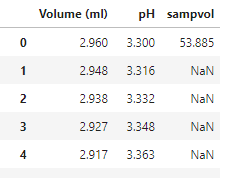

In [19]:
# code to display a sample of properly formatted input
from base64 import b64decode

from IPython import display

print("Sample data to check for proper format")
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAOUAAACyCAYAAAC9QghZAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABk4SURBVHhe7Z1NSFxX/8e/+S+zVmLJSBshBIwQ40MZDAUhSAaVuKg2i7goEiQRTdRK002TRZJNDTZqFAlS5FnYRR59IEqUEZ9CIDgMwdGACiJIiiN5GbdZ+z9v93XuHSczd8zJ9PeR27n3zDn3nrfvOb/zm/TcYwcMEAShDf+nPgmC0AQSJUFoBomSIDSDREkQmkGiJAjNIFEShGaQKAlCM0iUBKEZGosygbGKClRUjLEzG6tjLIyFP3aEukhhttsj7ZGSax5s6d7NopOVtXMupb7TGJVXZ7sYZenE7DsVVMyovplve2ksyhrU9vHPQcRWRYAg8XJQfPZ/VyM+tWX1KXrnIxha7mIlyZGyZozP9CPac/ef0akJgdbma813/eJz8KUx+qaQ3OKf/ag9LwI0hc0Qf7DBo7EBtWUqKFfO17LSRtH7n8835xNHi95rStEhGVtJ1s0Z72JYmGeffbVy9jFMWePwMWlTc53i+zE14zquDbOru1N+iqMTY49lnLT7GvHV4WmqqHxGIrUoFQGWGdcpPlXax2O2e/mZucpiMOrgs+FThoKa1sYz1dE9K+og8dgWZs+DYT6ytrS+H2NtmX1c3gZG/zDjOkxzV54KYJpr7uhRHXJ+ATFW8NSrBTZnKNOVV1QLm436prGzs4MdZubhUesha81MNOAeu098OMLOo8xo7mD3jWOokV0+mpAVz595oRcYjotnTrO8ZTItq0JSknYafmV5XR6CeMojoMN85iAmfDp4+Tfs+/ld7Krrz0sUVddYGVTdpJWft4HZYcPMhFfhOZB4LNP3z/DnsWO0WQxyNTfVtZmHp44BLXqGt51sH16v69/w9poWA3xaXNbucX4v3n9Y3FbWf0ovd8i40ZgYBOz9TuaJL0uM5zMr5kKwwtRclIYJG8XCqxR234iqEaarQ6Ac96z6qZwJqVlNEvmmnP23FKEz8ppjPDPaExadrpWJiudt9y3/zIYqhOzmbGM5xFNCVfL6i8BYOpSiNiIHMEf5jUHSJppcEYMRY7CFCdw12MrZ0hD9OpI2Uci2s5CDI6trj7yY1oyj/xiTAR8IU4hFWas3DuHK+QRivM3NZYlPHeSJ9qI0Kiv65qmsEMN0/YyYI7c6unzWt+vJnIaHNORg9M+j9PK4aVXIGdjySLc+6sc0q3s5GwaPnAwGEZtzL0UKj/6iNEatR4OsiqyZsfTbBtFYphNoNSa+96o8YyYyRJJrJzfuM/iHXNtwEnPWuUlZLRq4WaXMn/xQo7MGg5HE8IYn8LRH2CqFdbpxD7Q547IZcX1XWCuR4SusPgzHX+6YJurchLP/qMlgsKeXPS+Chm95qHM5xVLJWTTgOvgCRGmZMY7Cq58LzDWMWl+OX/YYz85fUWsPaXZObBn3+0TOd8m1x3wvwmLNxEZsT30rs8ZsvDwQgw1bw/yghyQ5wpysaJX5yucnn0OwHDrG2nIczfX2tryLBRU3Z1RbhvkA4+g/SoAcmxe95qaxjjTyVYA64DsPEIXgw8GzrlMHp06NHqyokE/m7bODG6dOHdyY/aACPicBlEcnEqOsLLrUrZMvYqb8MilF8yhfc+b5jwfYuslz9ieKFhIlQWgGbZxFEJpBMyVBaAaJkiA0g0RJEJpBoiQIzSBREoRmHPvf//5H3leCOCIuXryozvyhn0QIQjPIfCUIzSBREoRmkCgJQjNIlAShGSRKgtAMEiVBaAaJkiA0g0RJEJpBoiQIzSiMKB07l3/qC26+MBw7pvttyuvcVdvYqd3A2JGbH/Ydx+07gbvTBEI27ZQpjr3savdyg4Ln3Q9He7DD3C/WeGHUIXmyl9ex16y9DZ3t7NyxPYCNmfk/swsUtdnTqRG+vdLKwSg/73p2oN/2RMHwYfaZtZGUKHv6xlIrI0Z9MFxxPszesL6z4Qj3uW++fEismO3imw/fOLxtbxw8e6uuWBmNTaiOIu++8A2xPMpx8HblYEXl1T9P9jLJjcJGE+ILZ5n4M8w+zeNZ9RAEgc+Uzp3L3ftkFh+ll5utjbHKQkjf65zvTWrbIrKsGR199r1TqzB90721Ft9PFD5pgqP0fI25R67YR9djd3nfOHzry74ONBtbL/4wBIg9VI8m75lw75AuKKtBjbE7vdiX17mruuBdEuuu3c/tewU7duN3vEbCtfN9ngQuSrnRcQTlX8lruWdrsNu6a4toVPkqAgvWeB7v0xCNzeP3lSOZZhbxNM6G5vUY1I7rXvDBFIfsAm6Pk0quOzs/H5BERz36vNvh+TL29/U1yfkLmODxRjRRBvtGy1CbMMsyODb+NjfH5uUdRKsyX4N44RE5egKDrTke9KLqmnwJjQW3FuS7UCRqx3PO211EH/ViV7wwhx0zVeh94LHjesGw1kl3cc9nK8ts4uiDeNWBep1EfHgdrba1rrl2fwDcUy8LclKDruUGLKiNlnevjZuWAL/vNNTG33+UI25aNyyNeh5/iVAVGxDyXUOTKINAOBfuAr96v1ek5qZsLNGgFTGUD0esN3KJF8fI03SzqNAYe9PuMLndTXPWSLKJoyfi7Vm2+jQF+ytw18shw508XLBKZLUvjZlPDkyx72S4TO81C9fgCmvbfK2CwEXpNlfd5mzRwQUpGtIaVdOxj6ZXePXI+viqnNWMF/wNUc41D69Hr1frBUXp5XsYYkZdprW/PQ5/r0r0jW34ME33o8/7J8PWufeGYbNeJPwt4f02S8dcJwtz1zZ4FnqdrBw+wSE8Wy7vq5c3rEhYGfHxvPF68PA6Oz2Y/h6+wnswPxysJGy5s3sUzbxniOPwVGrkfbXhqE+bFzndyyrPRXxbm1npZT822slddgu/8E+jIO8SEYXhYizyn0Nkg6py2g7ReDZROurD6KwmssHFd466st87/4b2QvxUYzzbLhxb3n3jcNT7OMThKFfh8+6HI7/2+rTnlR2WwCxRcnzTi8HFI71feB7QdiAEoRnk6CEIzSBREoRmkCgJQjNIlAShGSRKgtAMEiVBaAaJkiA0g0RJEJpx7OPHj/SPBwjiiDh+/Lg684dmSoLQDBIlQWgGiZIgNINESRCaQaIkCM0gURKEZpAoCUIzSJQEoRkkSoLQjAKKch/PfzqLsz89Z2dFzPvn6DnLyimOHjx/r8IdqLpQ8Z68VsF2Xj9h3z3BmrrkrI0fkiZfxDONZzifbXJonDU88cyfDM9478/M/nyPZ97Wxv3a0SKftIdRIFHyBqnDbb67ZJGzvwK0b2xggx9/XcLiRa+GYnVxekrFGcDmVXccJtp/j6hzBRND2/YAXvimyZ99hOX92fHi4SbaxtOfkCmOHDTiQLcKMOHtP4nQXzLdxsZ1VKtvdKM+4l3ubMgnbSYKIEo+K7Rhs/sW6lVIMVPS2GR1uBMnUalOLfaxt12Pge9VrBNNaO8eQdw+s7yewWL9AG6pS87+3ibq68Mo4RcnwrjEOsBeniOwm5Jz1fL+/Pxfl1C/vcdy6yRTnOpOKbiwujbYn5/E5sM7aDqhAnSmvh0D25O5zW75pM1AAURZgqbfNzD8fUhd/4N4v4fNSAjOkieR9LAYNveMrs1mlatstm08qa4lJScrsbQUlwJ4H8ciLiFcwE6+v7LIOpkaBHzIJg4n+TdYbmeU6cqOAswmwRFC04+VuP2b9zJLmql+ZnjmtLlCjp7AYBbCb7dR+WOTq9NWI9y9hMUVS4TxUXXKWBtvA/70MO/OXceL+kXU8c5wMYn23933DQJrrXsfdzDc6PWEbOLY4ZbBEm4vhZTZ+4LNJm2FWRMHBavrqdO3cX8+XVoljcPKBJfm+6Q7Toa0uUKiDALh7LkP/LKB6+dUmI3qzilU/lynRts4Qg/rUXmyRIzCk1+/8EzD12tcBLJDhBH3dSLlg7Rq+DPusKd5O+WyiZPOLXNwKkG4vt5mGeiJbKMZj3W75bCq+3kJS38nVbiFf9rcIFHmCxfkb8CdjeEMa6hqXFej7cZGC7DEDJ+yNczwRjbF2oYR9tcmxMdn01vMpDVmpWq0PIRttg2eksY7GGBGcjyD8LOJw0V48rQ6/aLgdex23LgcVn/aV/12vNLmDokyT9b+y1Z7v3iYllysHrPK/vx93D7dzgRsFyo/pnCL/U0JcbN1aWTEZirtI760JGbX4NjH2mtb7l7P4LaxbjXzniFOBqov3MLIv42y88GHrTH/FWTeC4MYdLYnMbmtAriPAJU4qcq7tuzykNtIS5sHJMq8UOuni9K8MQ73+snuLKj7ux0bnYf9QMBNRrvJW4fFem8zN3eYSJaN+7PjKjCVtm7NJo4H9vUwswDwZyYrQidYvf9YiSXDMac85W2q/HGHf9yNK20e0HYgBHGE0HYgBPEFQqIkCM0gURKEZpAoCUIzSJQEoRkkSoLQDBIlQWgGiZIgNOPYAUOdEwShATRTEoRmkCgJQjNIlAShGSRKgtAMEiVBaAaJkiA0g0RJEJpBoiQIzSBREoRmFECUCYxVVKDCPMZYSBHzbhadZlk7MftOhTtIYbbbqpOxVRXsCu+cS6lwSeKxV5oAWR0z7+/bTr5xMuQ9qzr5/KTmOl1lkiQeH57nfNIeRvCifJdE+cwOdnbYsTyECAbR2j3LmrA4Sb0COnhZRXkbsHDBq6HC6D0zbdbJeosRZxehayrtzjSqeu5aDcrE0Lo1hHhamuBIoVbenx3x4XW0Pk5/gn8c/7xnUye6EGn0Lnc25JM2E8GLsqwZzeeN8xCq+Of8LmvC4qT0cjNq1LlZXgcpJLciGPpBxWL109E3iJiY+WpQY9QVO6/ti2L3rbxKJdcRidSilF+U1aKBdYBkwDNO6fkaeX9+/m0DIlvJtMHTP45/3g+vE42IdGBoayK32S2ftBko7JqSzZrr/LOxHOUioMjh5U0rKxuQ5tWpjfWku/snEHvUj1rV0UtDVYhGY1IA72JYQANqy8RXBSH1aoF1MjUI+OAfx5l3B551ohPlaL5Whd4H3tacNFMNU9w942dOmzP8/xIpDCsHo6dOHZxix2hCBRU1Hw6edXmXdWXk1MGN2Q/GlagX8zoxKuro1KlR9o2TD7M3fL8LBpln/gwrf24yxMmQd4l/negAr1+jTPY2Whm5cfDsrTh1YI//qWk/hcKI8u2zgxuisfLP4BeBKG+msloDFO/Az1iDpndUGccITxdyYetSDABdz5iM/PGP48y74NA6+fzYhSXLIAcXp7DsbceOETn8ZJc2Nwrjfb3QiyjYOmp5HM0FNLm0gHsaHwD3djKVtQZdhuNj5wpY5aD8K/WVCYsz04/Bl9xAkuZgx2XDUKzBlWFg4VWgRpKD0sv3MMSM5FiG9ZF/HHveGVnViW7wOnY7bvgvCRMoX1Ztx8rojVfa3AlclKm5CQyyz8jwveIXJCPxH7ba+7U5fZ3FO6aH1zk1dxe9Zzpk3awmbGuUFGb/GET/d9xFwtZgjYOYMH9mSCEWjaIqlGnF96mkkFi15W71KXqNdauZ9wxxfPOeoU40Rww6WxOY2FIBwidShZDqx4mXvGd7k5Y2DwIX5e4b+TKFaE84wwK5WOCe1Sh6LxjllIf7N0W7syD8pgM7N5Vv8qskJsx0YSxE4ugSzpJSNI/ynxmMOrR/FxRMMi9tbdQCTI+6hZQhjm/es6sTPWH1fq0KUcMxpzzlraoMMfjNlBxX2jyg7UAIQjMK+5MIQRCfDImSIDSDREkQmkGiJAjNIFEShGaQKAlCM0iUBKEZJEqC0IxjHz9+pH88QBBHxPHjx9WZPzRTEoRmkCgJQjNIlAShGSRKgtAMEiVBaAaJkiA0g0RJEJpBoiQIzSBREoRmBC/K98/Rc/YszhrHT8+xr74qShzl7cHz9yrcwT6e/2TVyZPXKpixNm6Fnx1fM0LxxAizHT3zAdfk6ye2+z9hT/Ug6zjO7+zlspdXJ/bnezzLtDbu144W+aQ9jILMlJf+3MDGxgZePKwHordxP+jOpBH7K0A7Kysv78Zfl7B40auh6nD79JSKM4DNq0acNex9/UKGs2MKbUp41bhu3FMcU7jF/tobS0SqoNhHGC/UM1483ESbOShYHB6HDTj/HlHnCibStu0Bmc5RXv2oj3iXOxvySZuJ4EV5oglN5+Rpyb8ugckSS38nZUARUtLYxCSkOHESlerUYh972/UY+F7FYvXT3j2CuJg9qtFkE1roa15b6ezPT2LzYYv1nIAoOVcN4+mirbb3WG6dHBrn9QwW6wfYkGGxv7eJ+vqwTHcijEus8+7lOXsUjPp2DGxP5ja75ZM2AwVdU+6vLGKJfd66EHR30pT3e9iMhBBSl5IkknLXTQebe+nWQ/LvJVSedM+G+4gvVQY+S7rhbQVDSD6kx2Fm9lVmKTSeVNeSkpOVWFqKS/G+j2MRlxA+Ib7SkBCafqzE7d+8l1nSTPUz3zOnzZWCiNJYT9T9DAz8tYHrauYsbpgZ99ttVP7Y5OrY1Qh3L2FxxWi2NcRH1akdZfK1uOuKzUS3T4cDnyUl1lr3Pu5g2FP4/nHWxtuAP6+n5+3cdbyoX0Qd78gXk2j/3V0nmsHyO3Xae5lV0jhsLiO4+T7pjpMhba4URJTVnbIQG3+yUeQia5gC2N1aIZw994FfvAeg6s4pVP5cp0bbOEJsrW2fEcUgthzGhkfnXVvetEzfwClB0++yre4wyXk75bzj8Blkkq2HvcrLy8MFLDtzGHFfB5g+yDaa8Vj7Wk63up+XPJdi/mlzo6DmK86F5VrDY61SNHBB/gbc2RhGk6+JZnfctLBFNjN81Fb4vAPHL7DwTi/hsVl1+2hMv5LGOxhghmY8g3isOGuY4R3UHGjaMML+2oT4uCVgd0pVo+UhbJaCrvB8uh03XJCTCDFrT04y9pWzHa+0uRO4KPfnn1sjxus4ayrG6ZN6my95sPZftmL6xcM842L1mHn25+8zc7RdCpjFmcSUv3nP669gdbePtde23HEz2Vj7mXn3i+PtHZ4SAxNbU0dGbGYeXxN7rZX1Qww625OY3FYB3EeASpxUg+LassvLbCMtbR4UYKZcZCOmnO7PXmWFiAzghecsUAxwz+qSNNGNMrPD/buc3VlQ93e7NSu+S2JptM2R1m5CCi/m1063UXAwkSwbMx07rgJTaeZzNnHccHPXbq7XYbHe28zVD5b3HyuxZDjmlKfc6M9xh4/ZjSttHtB2IARxhNB2IATxBUKiJAjNIFEShGaQKAlCM0iUBKEZJEqC0AwSJUFoBomSIDTj2AFDnRMEoQE0UxKEZpAoCUIzSJQEoRkkSoLQDBIlQWgGiZIgNINESRCaQaIkCM0gURKEZhRUlKm5TlRUVGBsVQUUI+9m0cnKyMtZUdGJ2Xcq3EEKs91GHK/6SGDMES6vjfjG0TmXUt8HxOqY7f5j7KkeHBLHaGN+mPnL5r4aIPOenr/EY792tMgn7WEUUJQJPO0JYBchzUm9Ajp2drDDj+UGLFzwaqgwes9MqzhDWG+x4iQe844bA/pUgKAGXcY9xTGNfvbXcblUfR8MKdQirp4RH15H6+N0+WSKwztm+E2Hmc9xlb9s7qsLkcbc85dP2kwUTJSJx60YVOfFTOnlZiYhRVkIVerUIoXkVgRDP6hYZc3o6BtETM2KNTd55+1i3dif1NwE1oevWM8JiNLzNTBkXvptAyJbSZZbJ/5x+KBbhemb6bnK5r7aEOnA0NZEbrNbPmkzUBhRMpNu4hHriMP9KuAfwrsk1hvLUa4uJbvYnVenNtaT2XbTFGLRqsBnSTepVwusk9WaYvLCEYeXta8cSdMs9zbbsrnv56Uczdeq0Ptg1nPgsJvn6eZq5rS5UgBRsvXTg15E+zrQXKgtS7VElrvqWrOrA9agti+KhVdGsyUQe6ROs2H1KTN9awOfJSXWWvcu7pnmpxOfOG93EX3Ui91r0kzdmbF3zmzuqxHnuzB9phd3PdbspZfHTfOcm+IT7jgZ0uZK4KIU66f5fk+zpmgRzp67wK876DqvwmzU3JxGVU9YjbYxlA9HUBXKrqMmXq5bpm/glKJ5VHa4e0w+Fd1eI36GOI1DuGKU93wt+ueZVSAusrmvXsg2eprmD+CDqOF0C/dEEX0jS2jHP21uBCxKYxYYRCsvSItcVQ62FLEHlgvyAXBvZxzN6v0g6dgdN1eAKDN8vlJfZYTV51YDan3vGxyll+9hCAuIZVgfOeJ8VY6IDM5INvfVgxpcSXNKcUFOoHxZtd2M33LMK23uBCxKl9dQFaJ/xnsGKQYS/1lAw69uk5XBxeoxQ6Tm7jJzlJn22QhtNYbBM6H0ewdCColVW+64mQw1AJh5zxCnrJad9eKpGmy5M2qwj5vZGdJojhhAtiYwsaUC+LoZVebLmBIv/V2XaWnzoDCOnn8M3LMaRe8Fad4Yh9sqsDsLxE8IWZr2qeQ6It843UbBwaT+0jCp2dECTI+6B5dMcbiJOg0wK0iUK9qAuChXNvfVFVama1WIGo455SkXVh87YsjkuHSlzQPaDoQgNINmSoLQDBIlQWgGiZIgNINESRCaQaIkCM0gURKEZpAoCUIzSJQEoRnHPn78SP94gCCOiOPHj6szf2imJAjNIFEShGaQKAlCM0iUBKEZJEqC0AwSJUFoBomSIDSDREkQmkGiJAitAP4fX6pxTqasNywAAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

# Data input
Replace `alk1.csv` with the filename of your csv.

In [20]:
# put the uploaded csv file into a pandas dataframe
# the file name needs to match exactly to the uploaded file
import pandas as pd

df1 = pd.read_csv("alk7.csv")
df2 = pd.read_csv("alk8.csv")

Check that your data is formatted like the example data above.

In [21]:
# see what the data looks like in the dataframe
df1

,Volume (ml),pH,sampvol
0,0.00,10.311,9.137
1,0.02,10.378,NaN
2,0.04,10.252,NaN
3,0.06,10.192,NaN
4,0.08,10.128,NaN
5,0.10,10.059,NaN
6,0.12,9.976,NaN
7,0.14,9.889,NaN
8,0.16,9.785,NaN
9,0.18,9.665,NaN


# Examine the data of replicate 1
This is your raw titration data. You might notice burette refilling artifacts since the burette can only hold 1 ml of acid. This figure is saved for you to include in your lab report.

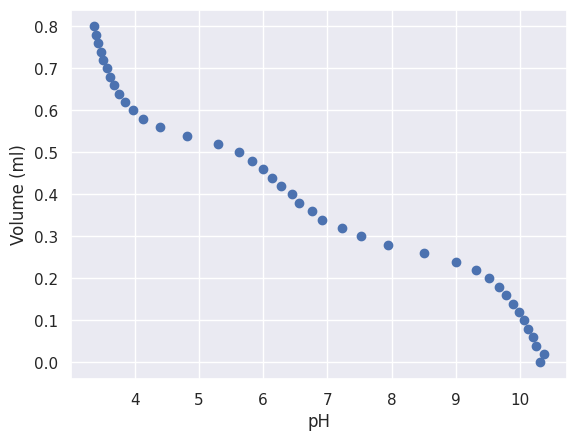

In [22]:
# to plot the data we need to import matlibplot
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set()
# plot the data and label the axes
plt.scatter(df1["pH"], df1["Volume (ml)"])
plt.xlabel("pH")
plt.ylabel("Volume (ml)")
plt.show()

# Gran Analysis Replicate 1
The Gran function is calculated and plotted for you.

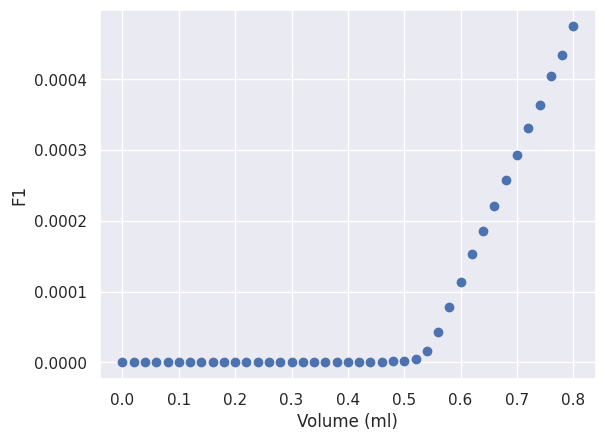

In [23]:
# calculate the Gran function for the entire data set assuming an activity coefficient of 1
# volume of sample
Vs = df1["sampvol"][0]
# normality of the acid
Nt = 0.0286
# H+ activity
H = 10 ** -df1["pH"].values
# activity coefficiet
act_coef = 1
# calculate gran function
F1 = ((Vs + df1["Volume (ml)"].values) / Vs) * (H / act_coef)

# plot the Gran function
plt.scatter(df1["Volume (ml)"], F1)
plt.ylabel("F1")
plt.xlabel("Volume (ml)")
plt.show()

# Examine the linear portion of the Gran function and indicate the volume where the linear portion of the Gran function begins
To determine the end point for the titration, we only need to use data at the end of the titration where the data are linear and increasing rapidly. Note the volume where the data start to increase rapidly.

In [24]:
# asks for the volume where the linear portion of the Gran function begins and finds the index value for that point
startvol = input(
    "Examine the Gran plot and input the volume you would like to start the regression for the linear portion of the plot: "
)
ind = find_neighbours(df1, float(startvol))

# Examine the extract Gran function
Select the next cell and run it. Take a look at the plot and see if you've selected the linear portion of the data. If you need to refine your start point, run the cell above again and revise the start volume. Run the cell below again to check your refinement.

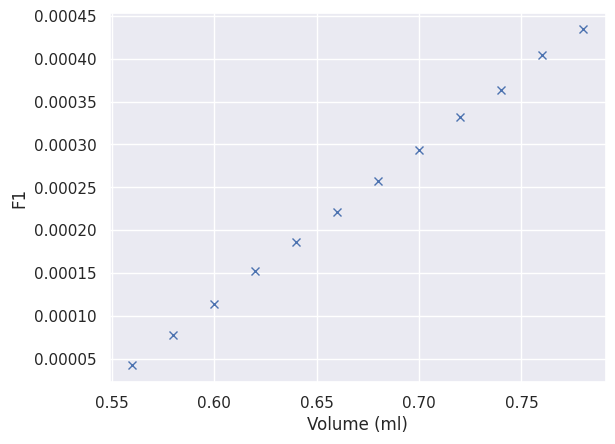

In [25]:
# define variables with the extract of data we are interested in
vol = df1["Volume (ml)"][ind[0] : -1].values
F1ex = F1[ind[0] : -1]
# I'll plot just that section of the Gran function
plt.figure()
plt.plot(vol, F1ex, marker="x", linestyle="none")
plt.xlabel("Volume (ml)")
plt.ylabel("F1")
plt.show()

# Final analysis replicate 1
To determine the endpoint for our titration we need to fit a curve to this section of the gran function and then extrapolate that line back to the x-axis. The point where our extrapolated line intersects the x-axis is the endpoint volume for our titration. We'll use the `numpy` module to help us do that. The final plot is saved for you to include in your lab report.

[alk] = 1.678e-03 M


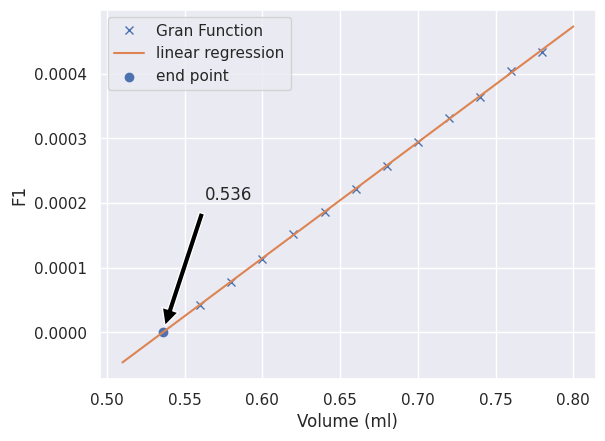

In [26]:
# import the numpy module so we can call various functions for the linear regression
import numpy as np

# get the coefficients for the linear regression fit to our extracted portion of data
coefficients = np.polyfit(vol, F1ex, 1)

# put those coefficients into a 1st degree polynomial so we can calculate some points to
# show the linear regression on our plot
polynomial = np.poly1d(coefficients)

# choose a couple of x values to calculate y values for plotting our linear regression
volex = [df1["Volume (ml)"][ind[0]] - 0.05, df1["Volume (ml)"].iloc[-1]]
fit_line = polynomial(volex)

# calculate the end point of the titration (i.e., the x value when y =0)
endpoint = round(-1 * coefficients[1] / coefficients[0], 3)

# calculate the alkalinity using the end point vol, sample volume, and acid concentration
alk = Nt * endpoint / Vs
print("[alk] = %.3e M" % alk)

# plot the extracted portion of the Gran function, the linear regression, and end point
plt.figure()
plt.plot(vol, F1ex, marker="x", linestyle="none", label="Gran Function")
plt.plot(volex, fit_line, label="linear regression")
plt.scatter(endpoint, 0, marker="o", label="end point")
plt.xlabel("Volume (ml)")
plt.ylabel("F1")
plt.legend()

# annotate the plot to show the value of the end point
plt.annotate(
    str(endpoint),
    xy=(endpoint, 0),
    xycoords="data",
    xytext=(0.26, 0.5),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)

# Save and download the plot
plt.savefig("alk_analysis_r1.png", bbox_inches="tight")
plt.savefig("alk_analysis_r1.pdf", bbox_inches="tight")

# Examine the data of replicate 2
This is your raw titration data. You might notice burette refilling artifacts since the burette can only hold 1 ml of acid. This figure is saved for you to include in your lab report.

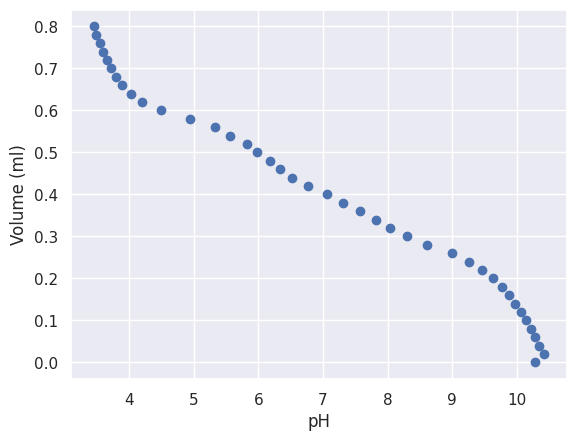

In [27]:
# to plot the data we need to import matlibplot
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set()
# plot the data and label the axes
plt.scatter(df2["pH"], df2["Volume (ml)"])
plt.xlabel("pH")
plt.ylabel("Volume (ml)")
plt.show()

# Gran Analysis Replicate 2
The Gran function is calculated and plotted for you.

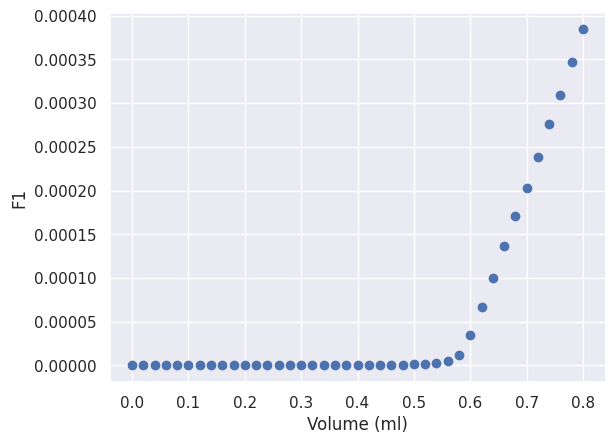

In [28]:
# calculate the Gran function for the entire data set assuming an activity coefficient of 1
# volume of sample
Vs = df2["sampvol"][0]
# normality of the acid
Nt = 0.0286
# H+ activity
H = 10 ** -df2["pH"].values
# activity coefficiet
act_coef = 1
# calculate gran function
F1 = ((Vs + df2["Volume (ml)"].values) / Vs) * (H / act_coef)

# plot the Gran function
plt.scatter(df2["Volume (ml)"], F1)
plt.ylabel("F1")
plt.xlabel("Volume (ml)")
plt.show()

# Examine the linear portion of the Gran function and indicate the volume where the linear portion of the Gran function begins
To determine the end point for the titration, we only need to use data at the end of the titration where the data are linear and increasing rapidly. Note the volume where the data start to increase rapidly.

In [29]:
# asks for the volume where the linear portion of the Gran function begins and finds the index value for that point
startvol = input(
    "Examine the Gran plot and input the volume you would like to start the regression for the linear portion of the plot: "
)
ind = find_neighbours(df2, float(startvol))

# Examine the extract Gran function
Select the next cell and run it. Take a look at the plot and see if you've selected the linear portion of the data. If you need to refine your start point, run the cell above again and revise the start volume. Run the cell below again to check your refinement.

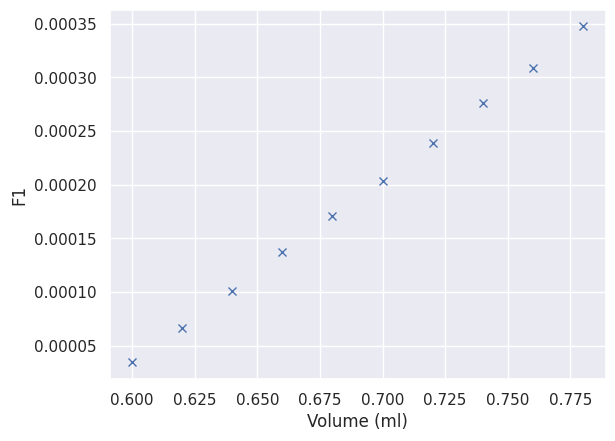

In [30]:
# define variables with the extract of data we are interested in
vol = df2["Volume (ml)"][ind[0] : -1].values
F1ex = F1[ind[0] : -1]
# I'll plot just that section of the Gran function
plt.figure()
plt.plot(vol, F1ex, marker="x", linestyle="none")
plt.xlabel("Volume (ml)")
plt.ylabel("F1")
plt.show()

# Final analysis replicate 2
To determine the endpoint for our titration we need to fit a curve to this section of the gran function and then extrapolate that line back to the x-axis. The point where our extrapolated line intersects the x-axis is the endpoint volume for our titration. We'll use the `numpy` module to help us do that. The final plot is saved for you to include in your lab report.

[alk] = 1.668e-03 M


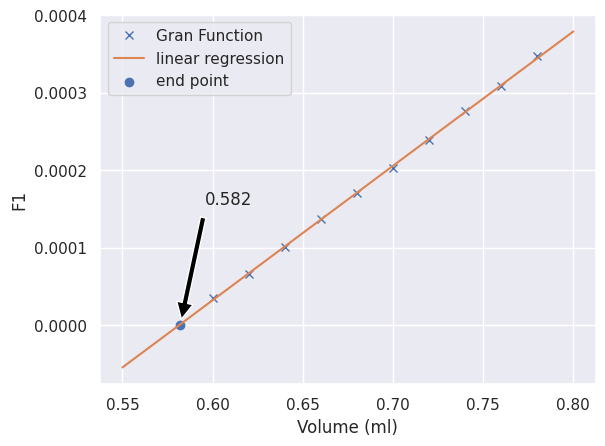

In [31]:
# import the numpy module so we can call various functions for the linear regression
import numpy as np

# get the coefficients for the linear regression fit to our extracted portion of data
coefficients = np.polyfit(vol, F1ex, 1)

# put those coefficients into a 1st degree polynomial so we can calculate some points to
# show the linear regression on our plot
polynomial = np.poly1d(coefficients)

# choose a couple of x values to calculate y values for plotting our linear regression
volex = [df2["Volume (ml)"][ind[0]] - 0.05, df2["Volume (ml)"].iloc[-1]]
fit_line = polynomial(volex)

# calculate the end point of the titration (i.e., the x value when y =0)
endpoint = round(-1 * coefficients[1] / coefficients[0], 3)

# calculate the alkalinity using the end point vol, sample volume, and acid concentration
alk = Nt * endpoint / Vs
print("[alk] = %.3e M" % alk)

# plot the extracted portion of the Gran function, the linear regression, and end point
plt.figure()
plt.plot(vol, F1ex, marker="x", linestyle="none", label="Gran Function")
plt.plot(volex, fit_line, label="linear regression")
plt.scatter(endpoint, 0, marker="o", label="end point")
plt.xlabel("Volume (ml)")
plt.ylabel("F1")
plt.legend()

# annotate the plot to show the value of the end point
plt.annotate(
    str(endpoint),
    xy=(endpoint, 0),
    xycoords="data",
    xytext=(0.26, 0.5),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)

# Save and download the plot
plt.savefig("alk_analysis_r2.png", bbox_inches="tight")
plt.savefig("alk_analysis_r2.pdf", bbox_inches="tight")

# Raw titration figure for report

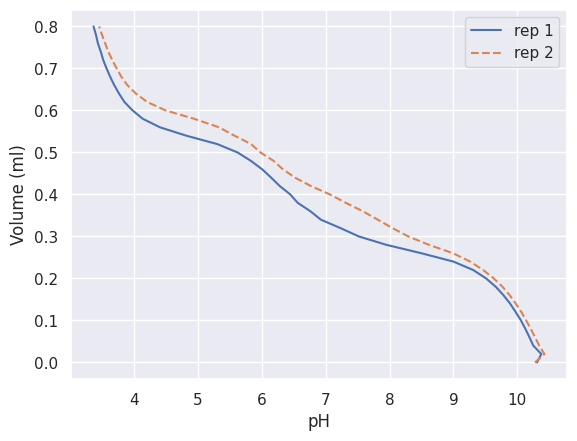

In [32]:
plt.plot(df1["pH"], df1["Volume (ml)"], label="rep 1")
plt.plot(df2["pH"], df2["Volume (ml)"], label="rep 2", linestyle="--")
plt.xlabel("pH")
plt.ylabel("Volume (ml)")
plt.legend()
plt.savefig("raw_titration.png", bbox_inches="tight")
plt.savefig("raw_titration.pdf", bbox_inches="tight")